<a href="https://colab.research.google.com/github/NguyenHuuAnhVu/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/Ki%E1%BB%83m%20%C4%91%E1%BB%8Bnh%20ANOVA/ANOVA_with_COVID_19_Case_Study_One_Way_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bài viết gốc: https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/#h2_3

Mục tiêu: Phân tích mối quan hệ giữa mật độ dân số giữa các vùng hoặc bang với số ca dương tính với covid19

In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d sudalairajkumar/covid19-in-india

  0% 0.00/758k [00:00<?, ?B/s]
100% 758k/758k [00:00<00:00, 12.2MB/s]


In [ ]:
!unzip covid19-in-india.zip

Archive:  covid19-in-india.zip
  inflating: StatewiseTestingDetails.csv  
  inflating: covid_19_india.csv      
  inflating: covid_vaccine_statewise.csv  


In [ ]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from scipy import stats

from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
import seaborn as sns

- file StatewiseTestingDetails.csv chứa thông tin các bang của Ấn Độ về số ca dương âm tính sau khi test covid
- file population_india_cencus2011.csv chứa thông tin liên quan tới dân số

In [ ]:
StatewiseTestingDetails = pd.read_csv('/content/StatewiseTestingDetails.csv')
population_india_cencus2011 = pd.read_csv('https://raw.githubusercontent.com/covid19india/deep-dive/master/data/dataset/population_india_census2011.csv')

Tên 1 bang ở file population_india_cencus2011.csv là 'Telengana', file kia là 'Telangana'

=> Đổi lại tên cho thống nhất

In [ ]:
StatewiseTestingDetails.loc[StatewiseTestingDetails.State=='Telangana', ['State']] = 'Telengana'

In [ ]:
StatewiseTestingDetails.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [ ]:
population_india_cencus2011.head(3)

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918


In [ ]:
print('số bang của Ấn Độ: %d' %len(StatewiseTestingDetails.State.unique()))
print('nhóm số liệu theo bang, xem mỗi bang có bao nhiêu lần được tính số liệu:\n',
      StatewiseTestingDetails.State.value_counts().head())

số bang của Ấn Độ: 36
nhóm số liệu theo bang, xem mỗi bang có bao nhiêu lần được tính số liệu:
 Kerala            497
West Bengal       493
Odisha            492
Madhya Pradesh    492
Haryana           492
Name: State, dtype: int64


In [ ]:
StatewiseTestingDetails.Positive.sort_values(ascending=True).head()
# có nhiều bang mà không có ca dương tính trong vòng 1 ngày

10659    0.0
10691    0.0
10692    0.0
10693    0.0
10694    0.0
Name: Positive, dtype: float64

In [ ]:
StatewiseTestingDetails.loc[StatewiseTestingDetails.Positive==0, 'State'].unique()
# bang không có ca dương tính trong 1 ngày

array(['Dadra and Nagar Haveli and Daman and Diu', 'Nagaland', 'Sikkim'],
      dtype=object)

In [ ]:
StatewiseTestingDetails.loc[StatewiseTestingDetails.Positive==1, 'State'].unique()
# bang chỉ có 1 ca dương tính trong 1 ngày

array(['Arunachal Pradesh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Mizoram', 'Sikkim'], dtype=object)

In [ ]:
StatewiseTestingDetails.describe(include='all')
# nhận thấy có nhiều giá trị bị khuyết khi nhìn vào tổng số mẫu xét nghiệm, số trường hợp âm dương tính

,Date,State,TotalSamples,Negative,Positive
count,16336,16336,1.633600e+04,6969,5.662000e+03
unique,497,36,NaN,6898,NaN
top,2021-05-05,Kerala,NaN,26000,NaN
freq,35,497,NaN,3,NaN
mean,NaN,NaN,5.376466e+06,NaN,5.652654e+04
std,NaN,NaN,8.780338e+06,NaN,1.673108e+05
min,NaN,NaN,5.800000e+01,NaN,0.000000e+00
25%,NaN,NaN,1.729098e+05,NaN,5.362500e+02
50%,NaN,NaN,9.307580e+05,NaN,4.771000e+03
75%,NaN,NaN,7.284795e+06,NaN,3.361875e+04


In [ ]:
# tính median cho mỗi bang
stateMedian=StatewiseTestingDetails.groupby('State')[['Positive']].median().reset_index().rename(columns={'Positive':'Median'})
stateMedian
# có thể xử lí dữ liệu bị khuyết băng cách gán bằng giá trị median của mỗi bang

,State,Median
0,Andaman and Nicobar Islands,4846.0
1,Andhra Pradesh,4126.0
2,Arunachal Pradesh,101.0
3,Assam,6067.5
4,Bihar,5695.0
5,Chandigarh,334.0
6,Chhattisgarh,1905.0
7,Dadra and Nagar Haveli and Daman and Diu,495.0
8,Delhi,32810.0
9,Goa,629.0


Từ kq trên thấy hàng 18 bang 'Lakshadweep' hoàn toàn không có số liệu thống kê => xóa bang này

In [ ]:
stateMedian = stateMedian.drop(stateMedian.loc[stateMedian.Median.isna()].index).reset_index()
# chạy khối bên dưới để xem chức năng của reset_index()

In [ ]:
stateMedian = stateMedian.drop(columns=['index'])
stateMedian

,State,Median
0,Andaman and Nicobar Islands,4846.0
1,Andhra Pradesh,4126.0
2,Arunachal Pradesh,101.0
3,Assam,6067.5
4,Bihar,5695.0
5,Chandigarh,334.0
6,Chhattisgarh,1905.0
7,Dadra and Nagar Haveli and Daman and Diu,495.0
8,Delhi,32810.0
9,Goa,629.0


Kết quả trên cho thấy bang có Median = Nan đã bị loại bỏ

Vì ở trên đã loại bỏ bang 'Lakshadweep', nên để khớp hết tất cả thì cần loại bỏ bang này ở tất cả các file

In [ ]:
StatewiseTestingDetails = StatewiseTestingDetails.drop(
    StatewiseTestingDetails.loc[StatewiseTestingDetails.State=='Lakshadweep'].index)

Xử lí dữ liệu cột Positive bị khuyết bằng cách gán giá trị khuyết đó thành median tương ứng với mỗi bang:

In [ ]:
for i, row in StatewiseTestingDetails.iterrows():
    if pd.isna(row['Positive']):
        StatewiseTestingDetails.loc[i, ['Positive']] = stateMedian.loc[stateMedian.State==row['State'], 'Median'].values[0]

In [ ]:
StatewiseTestingDetails.describe(include='all')

,Date,State,TotalSamples,Negative,Positive
count,16141,16141,1.614100e+04,6969,1.614100e+04
unique,497,35,NaN,6898,NaN
top,2020-07-25,Kerala,NaN,26000,NaN
freq,35,497,NaN,3,NaN
mean,NaN,NaN,5.440179e+06,NaN,3.208744e+04
std,NaN,NaN,8.813944e+06,NaN,1.076117e+05
min,NaN,NaN,5.800000e+01,NaN,0.000000e+00
25%,NaN,NaN,1.823840e+05,NaN,6.290000e+02
50%,NaN,NaN,9.831870e+05,NaN,4.730000e+03
75%,NaN,NaN,7.406377e+06,NaN,1.839000e+04


Kết quả sau khi xử lí: trường hợp dương tính bị khuyết đã đc lấp đầy giá trị: từ 5.662x10^3 lên 1.6141x10^4

### Loại bỏ bang không chứa dữ liệu, đổi tên cột, gộp file
- Vì ở trên đã bỏ bang 'Lakshadweep' do thiếu quá nhiều số liệu nên trước khi gộp 2 file csv ban đầu, ta cần loại bỏ bang này
- Muốn gộp cần có chung tên cột, nên đổi tên cột 'State / Union Territory' trong file population_india_cencus2011.csv thành 'State'

In [ ]:
population_india_cencus2011['State / Union Territory'].sort_values().unique()
# in ra các bang

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telengana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

Tính ra số lượng bang

In [ ]:
population_india_cencus2011.groupby('State / Union Territory')['State / Union Territory'].count().shape

(36,)

In [ ]:
len(population_india_cencus2011['State / Union Territory'].sort_values().unique())

36

In [ ]:
# loại bỏ bang 'Lakshadweep' ở 2 file
population_india_cencus2011 = population_india_cencus2011.drop(
    population_india_cencus2011.loc[population_india_cencus2011['State / Union Territory']=='Lakshadweep'].index)
StatewiseTestingDetails = StatewiseTestingDetails.drop(
    StatewiseTestingDetails.loc[StatewiseTestingDetails.State=='Lakshadweep'].index)

Sau khi loại bỏ, đã không thấy bang 'Lakshadweep' trong dữ liệu in ra

In [ ]:
StatewiseTestingDetails['State'].sort_values().unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telengana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

Sau khi loại bỏ, số lượng bang còn 35

In [ ]:
len(population_india_cencus2011['State / Union Territory'].sort_values().unique())

35

Để gộp được file cần đổi tên cột 'State / Union Territory' thành 'State' cho trùng khớp tên cột ở 2 file

In [ ]:
population_india_cencus2011.columns

Index(['Sno', 'State / Union Territory', 'Population', 'Rural population',
       'Urban population', 'Area', 'Density', 'Gender Ratio'],
      dtype='object')

In [ ]:
population_india_cencus2011.rename(columns={'State / Union Territory':'State'}, inplace=True)
population_india_cencus2011.columns

Index(['Sno', 'State', 'Population', 'Rural population', 'Urban population',
       'Area', 'Density', 'Gender Ratio'],
      dtype='object')

In [ ]:
df = pd.merge(population_india_cencus2011, StatewiseTestingDetails, on='State')
df.head()

,Sno,State,Population,Rural population,Urban population,Area,Density,Gender Ratio,Date,TotalSamples,Negative,Positive
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912,2020-04-05,5255.0,4796,278.0
1,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912,2020-04-05,5255.0,4796,278.0
2,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912,2020-04-09,8402.0,7898,410.0
3,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912,2020-04-10,9332.0,8798,433.0
4,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912,2020-04-11,10595.0,10012,452.0


Để trực quan hơn, phân mật độ dân số (density) theo từng nhóm (chia thành 4 nhóm)

Dữ liệu cột Density:
- Mật độ được ngăn bởi dấu '/'
- Số thập phân được ngăn cách bởi dấu chấm: ví dụ 2.8 km2
- Số lớn hơn 3 chữ số, hàng nghìn ngăn cách bởi dấu phẩy: ví dụ 20,290 km2
- Không có số nào có dạng chứa cả dấu chấm và phẩy: ví dụ 20,456.4 km2

In [ ]:
def convert_Density(df):
    df['DensityGroup'] = 0
    for i, row in df.iterrows():
        val = row['Density'].split('/')[0]
        if(',' in val):
            val = int(val.split(',')[0] + val.split(',')[1])
        elif '.' in val:
            val = round(float(val))
        else:
            val = int(val)
        
        if 0 <= val < 300:
            status = 'G1'
        elif 300<=val<600:
            status = 'G2'
        elif 600<=val<900:
            status = 'G3'
        else:
            status = 'G4'
        df.loc[i, ['DensityGroup']] = status
    return df

In [ ]:
convert_Density(df)

,Sno,State,Population,Rural population,Urban population,Area,Density,Gender Ratio,Date,TotalSamples,Negative,Positive,DensityGroup
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912,2020-04-05,5255.0,4796,278.0,G3
1,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912,2020-04-05,5255.0,4796,278.0,G3
2,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912,2020-04-09,8402.0,7898,410.0,G3
3,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912,2020-04-10,9332.0,8798,433.0,G3
4,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912,2020-04-11,10595.0,10012,452.0,G3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16136,35,Ladakh,274000,43840,230160,"96,701 km2 (37,336 sq mi)",2.8/km2 (7.3/sq mi),853,2021-08-05,446614.0,NaN,990.0,G1
16137,35,Ladakh,274000,43840,230160,"96,701 km2 (37,336 sq mi)",2.8/km2 (7.3/sq mi),853,2021-08-06,448829.0,NaN,990.0,G1
16138,35,Ladakh,274000,43840,230160,"96,701 km2 (37,336 sq mi)",2.8/km2 (7.3/sq mi),853,2021-08-07,450438.0,NaN,990.0,G1
16139,35,Ladakh,274000,43840,230160,"96,701 km2 (37,336 sq mi)",2.8/km2 (7.3/sq mi),853,2021-08-08,451917.0,NaN,990.0,G1


Mục đích của việc phân nhóm trên là để sử dụng 2-way ANOVA

In [ ]:
# trích xuất dữ liệu để sử dụng cho kiểm định ANOVA 2 chiều
df_2way_ANOVA = df[['State', 'DensityGroup']].drop_duplicates().sort_values(by='State')
print(df_2way_ANOVA.shape)
df_2way_ANOVA.head()

(35, 2)


,State,DensityGroup
15394,Andaman and Nicobar Islands,G1
4412,Andhra Pradesh,G2
11934,Arunachal Pradesh,G1
6792,Assam,G2
978,Bihar,G4


Tập hợp lại dữ liệu để chuẩn bị cho kiểm định ANOVA:

In [ ]:
df[df['DensityGroup']=='G1']['Positive'].values

array([193., 290., 341., ..., 990., 990., 990.])

In [ ]:
G1 = pd.DataFrame(df[df['DensityGroup']=='G1']['Positive'].values, columns=['G1'])
G2 = pd.DataFrame(df[df['DensityGroup']=='G2']['Positive'].values, columns=['G2'])
G3 = pd.DataFrame(df[df['DensityGroup']=='G3']['Positive'].values, columns=['G3'])
G4 = pd.DataFrame(df[df['DensityGroup']=='G4']['Positive'].values, columns=['G4'])
df_prepare = pd.concat([G1,G2,G3,G4], axis=1)
df_prepare.head()
# có thể tạo dataframe theo cách bên dưới
# df_prepare=pd.DataFrame({'Dense1':df[df['DensityGroup']=='G1']['Positive'],
#                         'Dense2':df[df['DensityGroup']=='G2']['Positive'],
#                         'Dense3':df[df['DensityGroup']=='G3']['Positive'],
#                         'Dense4':df[df['DensityGroup']=='G4']['Positive']})

,G1,G2,G3,G4
0,193.0,276571.5,278.0,32.0
1,290.0,868.0,278.0,38.0
2,341.0,1018.0,410.0,43.0
3,411.0,868.0,433.0,60.0
4,451.0,1135.0,452.0,61.0


### Trực quan hóa dữ liệu để kiểm tra phân phối chuẩn
Điều kiện áp dụng ANOVA cũng giống như t-test:
- **Dữ liệu tuân theo phân phối chuẩn**
- **Tính đồng nhất về phương sai**
- Mẫu quan sát được thu thập ngẫu nhiên từ quần thể
- Mẫu độc lập với nhau

Nếu vi phạm tính phân phối chuẩn: ANOVA vẫn hợp lệ nếu cỡ mẫu lớn

Nếu vi phạm tính đồng nhất về phương sai: ANOVA nói chung vẫn tạm đc nếu các nhóm có quy mô bằng nhau

Nếu vi phạm tính độc lập thì ANOVA không còn hợp lệ

Nếu 2 giả định về phương sai và phân phối chuẩn không được đáp ứng thì chuyển qua dùng kiểm định Kruskal Wallis

In [ ]:
df_prepare.describe()

,G1,G2,G3,G4
count,6826.000000,5.730000e+03,987.000000,2598.000000
mean,4671.097861,5.967981e+04,102061.897670,16681.325828
std,30827.727058,1.466865e+05,203861.109325,21753.372264
min,0.000000,2.000000e+00,265.000000,0.000000
25%,112.000000,4.126000e+03,10103.000000,529.750000
50%,990.000000,9.480500e+03,10103.000000,8425.500000
75%,4730.000000,4.627400e+04,76526.000000,31319.000000
max,791732.000000,1.638961e+06,932639.000000,151928.000000


Nhìn vào độ lệch chuẩn ở trên thì giả định về phương sai đã bị vi phạm

In [ ]:
print(df_prepare.mode())
print(df_prepare.median())
print(df_prepare.mean())
# nếu tuân theo phân phối chuẩn thì mean = mode = median

      G1      G2       G3       G4
0  101.0  4126.0  10103.0  32810.0
G1      990.0
G2     9480.5
G3    10103.0
G4     8425.5
dtype: float64
G1      4671.097861
G2     59679.814834
G3    102061.897670
G4     16681.325828
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

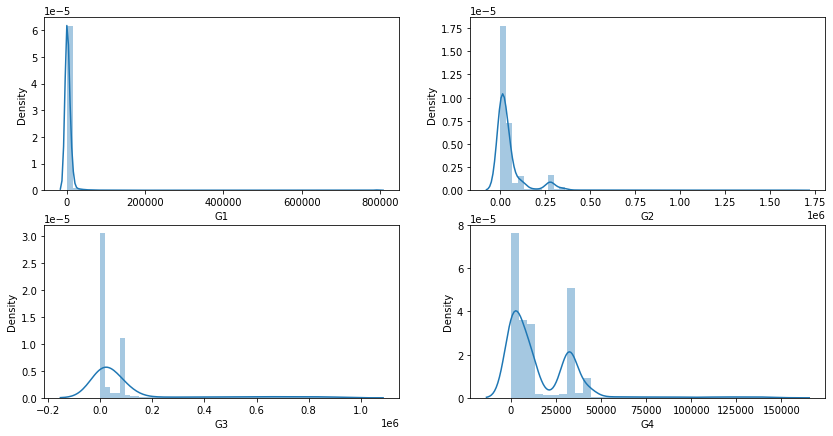

In [ ]:
import seaborn as sns
plt.figure(figsize=(14,7))

plt.subplot(221)
sns.distplot(df_prepare.G1, kde=True)

plt.subplot(222)
sns.distplot(df_prepare.G2, kde=True)

plt.subplot(223)
sns.distplot(df_prepare.G3, kde=True)

plt.subplot(224)
sns.distplot(df_prepare.G4, kde=True)

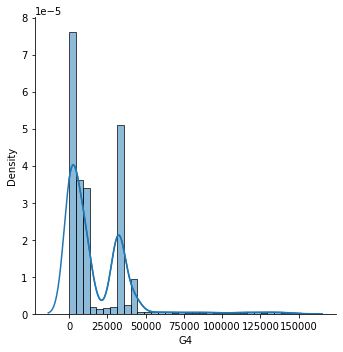

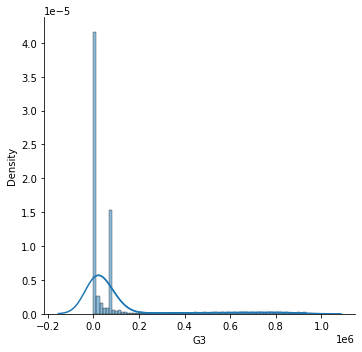

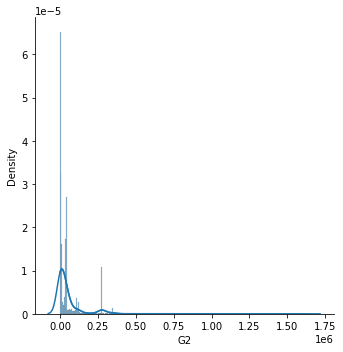

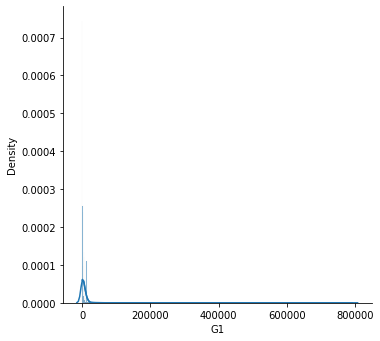

In [ ]:
sns.displot(df_prepare, x='G4', kind='kde')
sns.histplot(df_prepare, x='G4', stat='density', kde=True)
sns.displot(df_prepare, x='G3', kind='kde')
sns.histplot(df_prepare, x='G3', stat='density', kde=True)
sns.displot(df_prepare, x='G2', kind='kde')
sns.histplot(df_prepare, x='G2', stat='density', kde=True)
sns.displot(df_prepare, x='G1', kind='kde')
sns.histplot(df_prepare, x='G1', stat='density', kde=True)

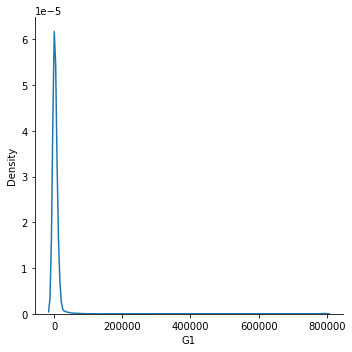

In [ ]:
sns.displot(df_prepare, x='G1', kind='kde')
# vẽ lại hình liên quan đến cột 'G1' vì ở hình trên hình không được rõ

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


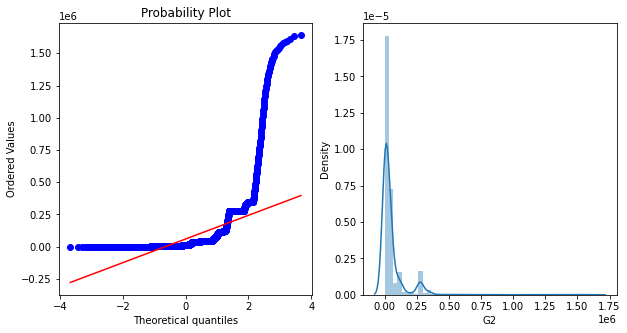

In [ ]:
import pylab
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
stats.probplot(df_prepare.G2.dropna(),plot=pylab)
plt.subplot(1,2,2)
sns.distplot(df_prepare.G2)
plt.show()

Nhìn tất cả các hình vẽ trên có thể thấy dữ liệu hoàn toàn không tuân theo phân phối chuẩn

Chuyển dữ liệu về dạng phân phối chuẩn bằng việc sử dụng pp Box-Cox

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

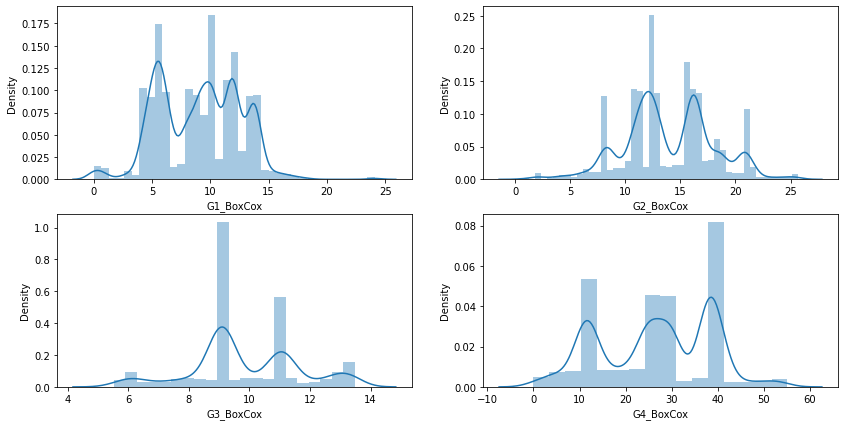

In [ ]:
plt.figure(figsize=(14,7))

plt.subplot(221)
df_1 = pd.DataFrame()
df_1['G1_BoxCox'], param = stats.boxcox(df_prepare.loc[df_prepare.G1>0, 'G1'])
sns.distplot(df_1.G1_BoxCox)

plt.subplot(222)
df_2 = pd.DataFrame()
df_2['G2_BoxCox'], param = stats.boxcox(df_prepare.loc[df_prepare.G2>0, 'G2'])
sns.distplot(df_2.G2_BoxCox)

plt.subplot(223)
df_3 = pd.DataFrame()
df_3['G3_BoxCox'], param = stats.boxcox(df_prepare.loc[df_prepare.G3>0, 'G3'])
sns.distplot(df_3.G3_BoxCox)

plt.subplot(224)
df_4 = pd.DataFrame()
df_4['G4_BoxCox'], param = stats.boxcox(df_prepare.loc[df_prepare.G4>0, 'G4'])
sns.distplot(df_4.G4_BoxCox)
plt.show()

Nhìn vào biểu đồ probplot bên dưới có thể thấy sau khi biến đổi BoxCox dữ liệu đã gần với phân phối chuẩn hơn

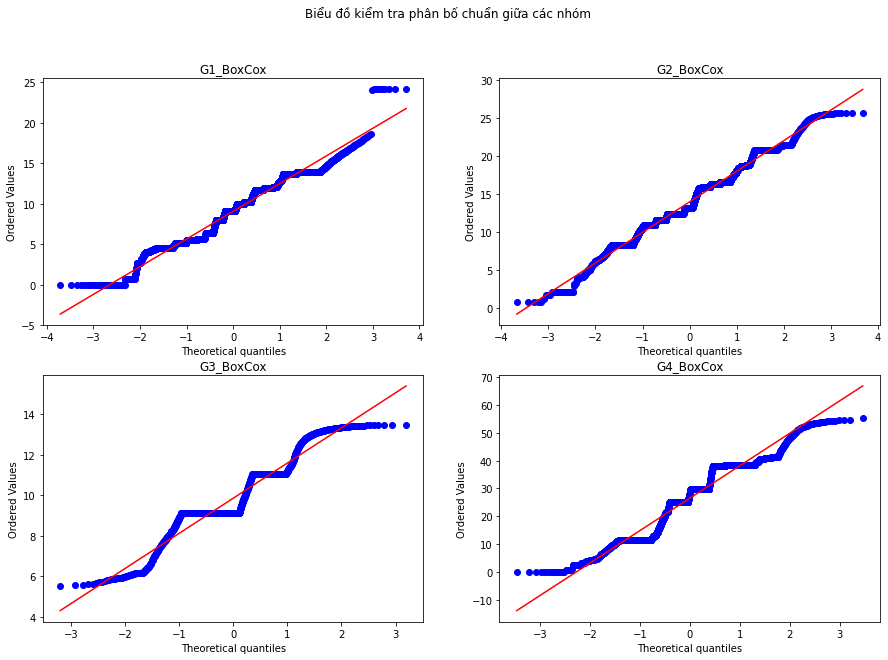

In [ ]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Biểu đồ kiểm tra phân bố chuẩn giữa các nhóm')

ax = fig.add_subplot(221)
stats.probplot(df_1.G1_BoxCox.dropna(),plot=pylab);
ax.set_title('G1_BoxCox')

ax = fig.add_subplot(222)
stats.probplot(df_2.G2_BoxCox.dropna(),plot=pylab);
ax.set_title('G2_BoxCox')

ax = fig.add_subplot(223)
stats.probplot(df_3.G3_BoxCox.dropna(),plot=pylab);
ax.set_title('G3_BoxCox')

ax = fig.add_subplot(224)
stats.probplot(df_4.G4_BoxCox.dropna(),plot=pylab);
ax.set_title('G4_BoxCox')

plt.show()

- Chuyển về phân phối chuẩn bằng Box-Cox
- Gán cho a là DataFrame chứa dữ liệu sau cùng sau khi xử lí

Trực quan a trước khi chuyển về pp chuẩn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


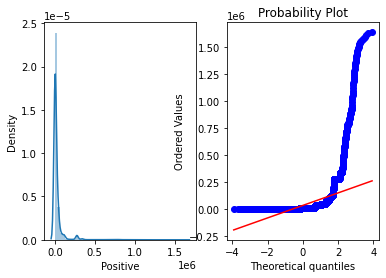

In [ ]:
a = df.loc[df.Positive>0, ['Positive','DensityGroup']]
plt.subplot(121)
sns.distplot(a.Positive)
plt.subplot(122)
stats.probplot(a.Positive,plot=pylab);

Trực quan a sau khi chuyển về pp chuẩn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


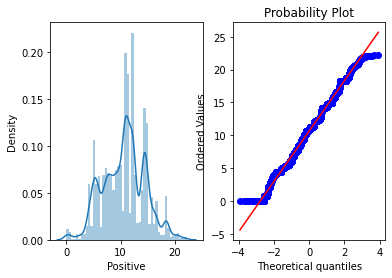

In [ ]:
a['Positive'], _ = stats.boxcox(a['Positive'])
plt.subplot(121)
sns.distplot(a.Positive)
plt.subplot(122)
stats.probplot(a.Positive,plot=pylab);

Trực quan hóa các nhóm của a sau khi chuyển về pp chuẩn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

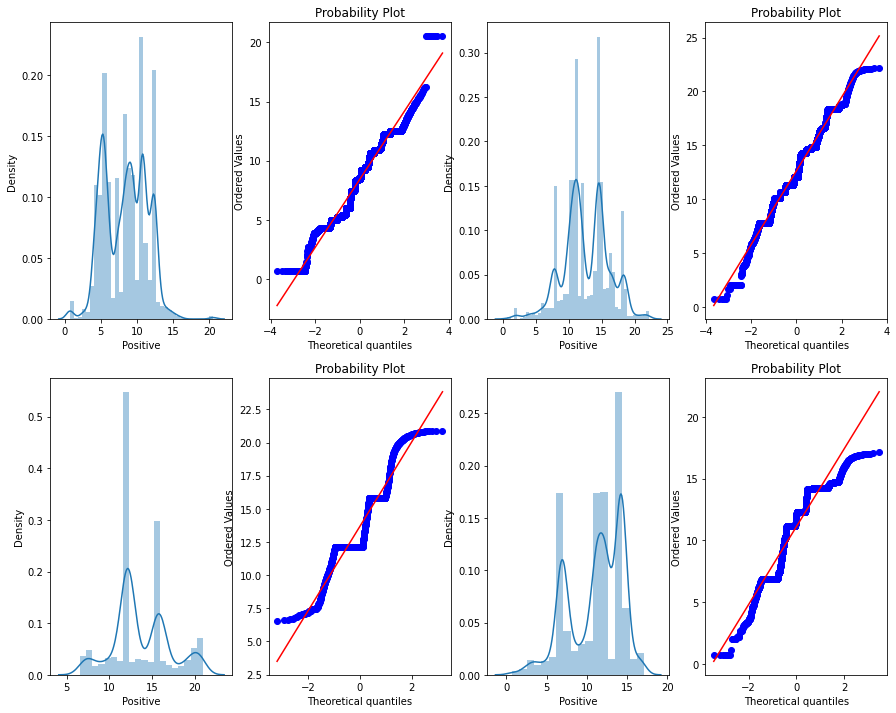

In [ ]:
plt.figure(figsize=(15,12))

plt.subplot(241)
sns.distplot(a.loc[(a.Positive>0) & (a.DensityGroup=='G1')].Positive)
plt.subplot(242)
stats.probplot(a.loc[(a.Positive>0) & (a.DensityGroup=='G1')].Positive,plot=pylab)

plt.subplot(243)
sns.distplot(a.loc[(a.Positive>0) & (a.DensityGroup=='G2')].Positive)
plt.subplot(244)
stats.probplot(a.loc[(a.Positive>0) & (a.DensityGroup=='G2')].Positive,plot=pylab);

plt.subplot(245)
sns.distplot(a.loc[(a.Positive>0) & (a.DensityGroup=='G3')].Positive)
plt.subplot(246)
stats.probplot(a.loc[(a.Positive>0) & (a.DensityGroup=='G3')].Positive,plot=pylab);

plt.subplot(247)
sns.distplot(a.loc[(a.Positive>0) & (a.DensityGroup=='G4')].Positive)
plt.subplot(248)
stats.probplot(a.loc[(a.Positive>0) & (a.DensityGroup=='G4')].Positive,plot=pylab);

Cách 1: Kiểm định ANOVA sử dụng stats.f_oneway()

In [ ]:
stats.f_oneway(a.loc[a.DensityGroup=='G1', ['Positive']],
               a.loc[a.DensityGroup=='G2', ['Positive']],
               a.loc[a.DensityGroup=='G3', ['Positive']],
               a.loc[a.DensityGroup=='G4', ['Positive']])

F_onewayResult(statistic=array([2135.4536393]), pvalue=array([0.]))

Cách 2: Kiểm định ANOVA sử dụng OLS Model

In [ ]:
model = ols('Positive ~ C(DensityGroup)', a).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Positive   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     2135.
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:22:37   Log-Likelihood:                -41760.
No. Observations:               16064   AIC:                         8.353e+04
Df Residuals:                   16060   BIC:                         8.356e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 8.3445      0.040    210.735      0.000       8.267       8.422
C(DensityGroup)[T.G2]     4.2917      0.058     73.397      0.000       4.177       4.406
C(DensityGroup)[T.G3]     5.3198      0.111     47.938      0.000       5.102       5.537
C(DensityGroup)[T.G4]     2.7108      0.075     35.981      0.000       2.563       2.859
==============================================================================
Omnibus:                      112.307   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.500
Skew:                          -0.205   Prob(JB):                     1.37e-25
Kurtosis:                       2.952   Cond. No.                         4.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Ở 2 cách trên, giá trị p-value đều < 0.05 nên bác bỏ H0**

**=> Kết luận: có sự khác biệt giữa mật độ dân số và số ca dương tính**

**Để biết xem có sự khác biệt giữa các nhóm nào cần kiểm định Turkey HSD**

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(groups=a.DensityGroup, endog=a.Positive, alpha=0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    G1     G2   4.2917 0.001  4.1415   4.442   True
    G1     G3   5.3198 0.001  5.0347  5.6049   True
    G1     G4   2.7108 0.001  2.5173  2.9044   True
    G2     G3    1.028 0.001  0.7397  1.3164   True
    G2     G4  -1.5809 0.001 -1.7792 -1.3826   True
    G3     G4  -2.6089 0.001 -2.9221 -2.2958   True
---------------------------------------------------


**Kết luận: có sự khác biệt giữa tất cả các nhóm trên**

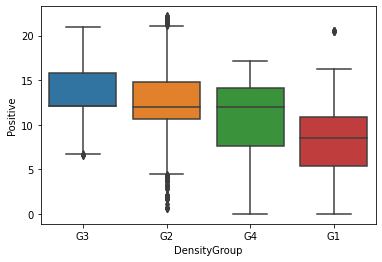

In [ ]:
sns.boxplot(data=a, x='DensityGroup', y='Positive')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


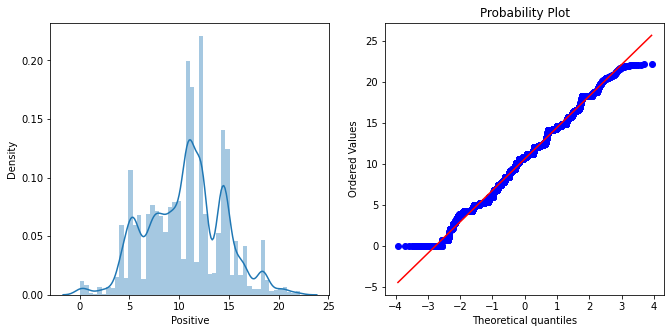

In [ ]:
plt.figure(figsize=(11,5))
plt.subplot(121)
sns.distplot(a.Positive)
plt.subplot(122)
res = model.resid
stats.probplot(a.Positive,plot=pylab);
plt.show()
# vẽ hình kiểm định phân phối chuẩn

In [ ]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)
# kiểm định phân phối chuẩn (pvalue>0.05 thì tuân theo pp chuẩn)

0.9895014762878418 1.6687693962465457e-32


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
w, pvalue = stats.bartlett(a.loc[a.DensityGroup=='G1', ['Positive']].values.flatten(),
                            a.loc[a.DensityGroup=='G2', ['Positive']].values.flatten(),
                            a.loc[a.DensityGroup=='G3', ['Positive']].values.flatten(),
                            a.loc[a.DensityGroup=='G4', ['Positive']].values.flatten())
w, pvalue
# kiểm định tính đồng nhất phương sai (pvalue>0.05 thì phương sai đồng nhất)

(110.61732592000938, 8.081253117691875e-24)

### Chức năng: drop_duplicates

In [ ]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
print(df.head())
df[['style', 'rating']].drop_duplicates()

     brand style  rating
0  Yum Yum   cup     4.0
1  Yum Yum   cup     4.0
2  Indomie   cup     3.5
3  Indomie  pack    15.0
4  Indomie  pack     5.0


,style,rating
0,cup,4.0
2,cup,3.5
3,pack,15.0
4,pack,5.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


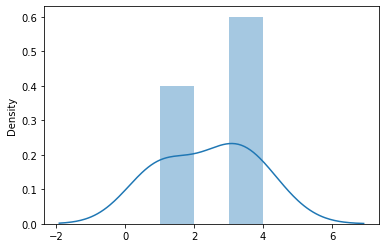

In [ ]:
import seaborn as sns
l = [1,3,4,1,3]
sns.distplot(l, kde=True, bins=3)

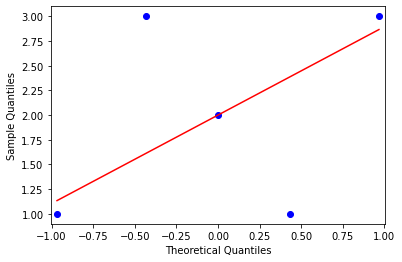

In [ ]:
import statsmodels.api as sm
l = [1,3,2,1,3]
l1 = pd.DataFrame(l, columns=['ab'])
sm.qqplot(l1, line='s')
plt.show()